# **COVID-19 Classifer**

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:27<00:00, 45.7MB/s]
100% 2.29G/2.29G [00:27<00:00, 89.7MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person544_virus_1075.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person544_virus_1076.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person544_virus_1078.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person544_virus_1079.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person544_virus_1080.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person545_bacteria_2287.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person545_bacteria_2288.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person545_bacteria_2289.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person545_bacteria_2290.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person545_virus_1081.jpeg  
  inflating: chest_xray/__MACOSX/ches

In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [4]:
train_path= '/content/chest_xray/train'
test_path= '/content/chest_xray/test'
valid_path = '/content/chest_xray/val'

In [5]:
dirls = os.listdir(train_path)
print(dirls)

['PNEUMONIA', 'NORMAL']


In [6]:
def loading_images(path):
    pathnames = []
    dir_list = os.listdir(path)
    unique_classes = sorted(dir_list)
    for i in range(len(unique_classes)):
        newpath = train_path + "/"+ unique_classes[i]
        pathnames.append(newpath)
    return(pathnames, unique_classes) 

In [7]:
def valid_loading_images(path):
    pathnames = []
    dir_list = os.listdir(path)
    unique_classes = sorted(dir_list)
    for i in range(len(unique_classes)):
        newpath = valid_path + "/"+ unique_classes[i]
        pathnames.append(newpath)
    return(pathnames, unique_classes) 

In [8]:
paths, classes = loading_images(train_path)
valid_paths,valid_classes=valid_loading_images(valid_path)

In [9]:
def labeling_images(unique_paths, unique_classes):
    img_paths =[]
    labels = []
    for path, label in zip(unique_paths, unique_classes):
        dir_list = os.listdir(path)
        for i in dir_list:
            img_dir_list = path + "/" + i
            img_paths.append(img_dir_list)
            labels.append(label)
    return(img_paths, labels)

In [10]:
img_paths , labels = labeling_images(paths, classes)
valid_img_paths,valid_lables=labeling_images(valid_paths, valid_classes)

In [11]:
print(img_paths.__len__())
print(labels.__len__())

5216
5216


In [12]:
print(valid_img_paths.__len__())
print(valid_lables.__len__())

16
16


<class 'numpy.ndarray'>


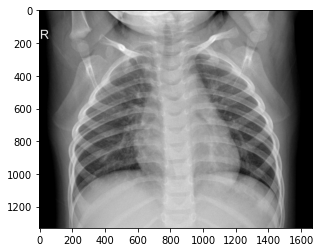

In [13]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
img = cv2.imread(img_paths[0])
print(type(img))
plt.imshow(img)

In [14]:
train_dataset = list(zip(img_paths, labels))
valid_dataset= list(zip(valid_img_paths, valid_lables))

In [15]:
train_dataset_df = pd.DataFrame(train_dataset, columns = ['Image_Paths', 'Labels'])
valid_dataset_df = pd.DataFrame(valid_dataset, columns = ['Image_Paths', 'Labels'])

In [16]:
train_dataset_df.head()

,Image_Paths,Labels
0,/content/chest_xray/train/NORMAL/NORMAL2-IM-04...,NORMAL
1,/content/chest_xray/train/NORMAL/NORMAL2-IM-04...,NORMAL
2,/content/chest_xray/train/NORMAL/IM-0704-0001....,NORMAL
3,/content/chest_xray/train/NORMAL/IM-0561-0001....,NORMAL
4,/content/chest_xray/train/NORMAL/IM-0506-0001....,NORMAL


In [17]:
train_dataset_df.tail()

,Image_Paths,Labels
5211,/content/chest_xray/train/PNEUMONIA/person1062...,PNEUMONIA
5212,/content/chest_xray/train/PNEUMONIA/person502_...,PNEUMONIA
5213,/content/chest_xray/train/PNEUMONIA/person406_...,PNEUMONIA
5214,/content/chest_xray/train/PNEUMONIA/person1644...,PNEUMONIA
5215,/content/chest_xray/train/PNEUMONIA/person779_...,PNEUMONIA


In [18]:
train_dataset_df['Labels'].value_counts()

PNEUMONIA    3875
NORMAL       1341
Name: Labels, dtype: int64

In [19]:
train, valid = train_test_split(train_dataset_df, test_size=0.2)

In [20]:
train['Labels'].value_counts()

PNEUMONIA    3078
NORMAL       1094
Name: Labels, dtype: int64

In [21]:
valid['Labels'].value_counts()

PNEUMONIA    797
NORMAL       247
Name: Labels, dtype: int64

## **Data is highly imbalanced**

(1897, 2538, 3)
(609, 941, 3)
(804, 1156, 3)
(888, 1224, 3)
(528, 856, 3)
(1152, 1546, 3)
(1175, 1438, 3)
(670, 1008, 3)
(712, 1344, 3)
(576, 752, 3)
(800, 1416, 3)
(701, 1021, 3)
(928, 1312, 3)
(840, 1192, 3)
(1304, 1640, 3)
(984, 1360, 3)
(648, 1128, 3)
(1028, 1530, 3)
(952, 1376, 3)
(1176, 1752, 3)


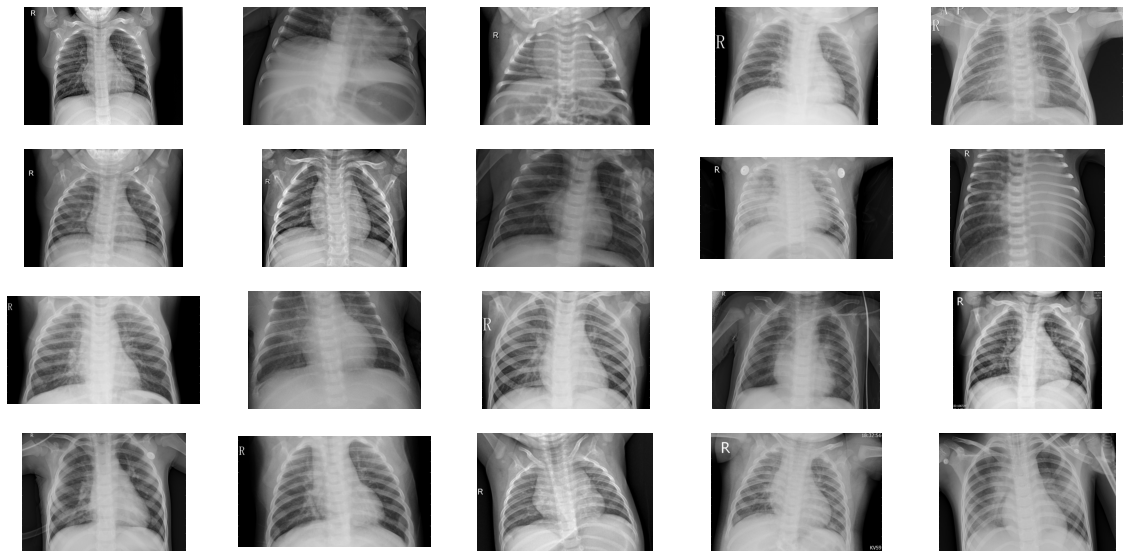

In [22]:
plt.figure(figsize=(20,10))
for i in range(20):
    vals = np.random.randint(0,len(train_dataset_df))
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.imread(train_dataset_df['Image_Paths'][vals]))
    print(cv2.imread(train_dataset_df['Image_Paths'][vals]).shape)
    plt.axis('off')
plt.show()

In [23]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [24]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train, x_col='Image_Paths', y_col='Labels', batch_size=16, 
                                               target_size = (224, 224),class_mode = 'categorical', shuffle=True)

Found 4172 validated image filenames belonging to 2 classes.


In [25]:
valid_gen = train_datagen.flow_from_dataframe(dataframe = valid, x_col='Image_Paths', y_col='Labels', batch_size=16, target_size = (224, 224),
                                              class_mode = 'categorical', shuffle=True)

Found 1044 validated image filenames belonging to 2 classes.


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


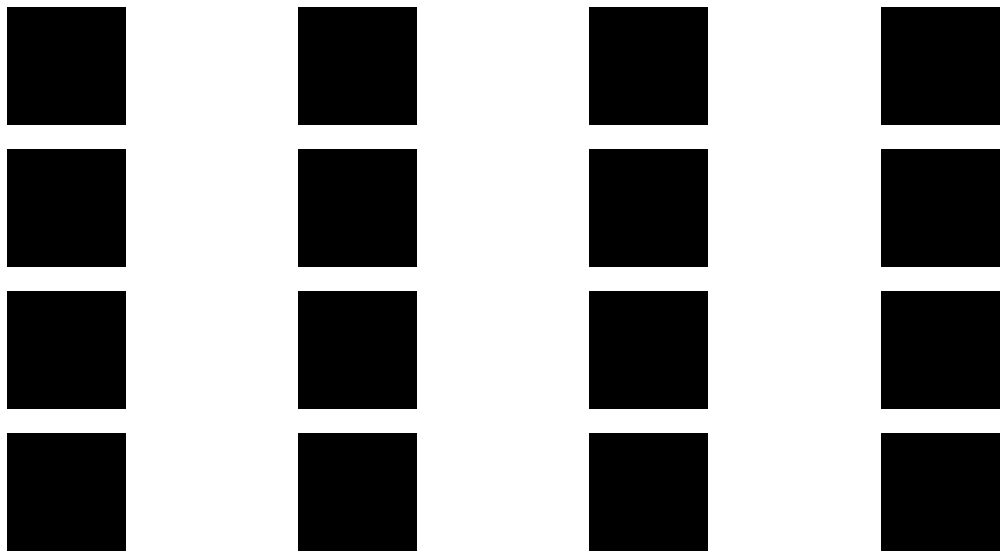

In [26]:
plt.figure(figsize=(20,10))
for i in range(16):
    vals = train_gen[0][0][i]
    print(vals.shape)
    vals = vals.astype('uint8')
    plt.subplot(4,4,i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

In [ ]:
gfydcvcyttdcgf ## breaking point

NameError: ignored

# **MODELS**
## A) VGG16
## B) VGG19
## C) Resnet 50
## D) Resnet 101
## E) Resnet 152

## [How to Treat Overfitting in Convolutional Neural Networks](https://www.analyticsvidhya.com/blog/2020/09/overfitting-in-cnn-show-to-treat-overfitting-in-convolutional-neural-networks/)

# **vgg16 model (224,224,3)**
### it may suffer over-fitting due to imbalanced data as data is not balanced but I have balanced by transfering some data from training data to valid set
![](https://www.researchgate.net/profile/Max-Ferguson/publication/322512435/figure/fig3/AS:697390994567179@1543282378794/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only.png)

In [27]:
base_model = tf.keras.applications.VGG16(weights='imagenet', input_shape=(224,224,3), include_top =False)

58900480/58889256 [==============================] - 1s 0us/step


In [28]:
for layer in base_model.layers:
  layer.trainable = False

In [29]:
network =Sequential()
network.add(base_model)
network.add(Flatten())
network.add(Dense(2, activation='softmax'))

In [30]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [31]:
network.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [32]:
network.fit(
  train_gen,
  validation_data=valid_gen,
  epochs=10,verbose=1
)

Epoch 1/10
261/261 [==============================] - 157s 548ms/step - loss: 0.2747 - accuracy: 0.8885 - val_loss: 0.1923 - val_accuracy: 0.9253
Epoch 2/10
261/261 [==============================] - 133s 509ms/step - loss: 0.2259 - accuracy: 0.9125 - val_loss: 0.2478 - val_accuracy: 0.9157
Epoch 3/10
261/261 [==============================] - 131s 503ms/step - loss: 0.2523 - accuracy: 0.9151 - val_loss: 0.2583 - val_accuracy: 0.9033
Epoch 4/10
261/261 [==============================] - 131s 502ms/step - loss: 0.1891 - accuracy: 0.9317 - val_loss: 0.1371 - val_accuracy: 0.9521
Epoch 5/10
261/261 [==============================] - 131s 503ms/step - loss: 0.1917 - accuracy: 0.9322 - val_loss: 0.1380 - val_accuracy: 0.9521
Epoch 6/10
261/261 [==============================] - 130s 498ms/step - loss: 0.1634 - accuracy: 0.9410 - val_loss: 0.2335 - val_accuracy: 0.9215
Epoch 7/10
261/261 [==============================] - 130s 496ms/step - loss: 0.1699 - accuracy: 0.9413 - val_loss: 0.1131 -

In [33]:
network.save('vgg16_model_covid.h5')

In [ ]:
gfyfyuvydytvtfyuytfyt

In [ ]:
from keras.models import load_model

In [ ]:
network = load_model('/content/vgg16_model_covid.h5')

## **loss: 0.1573 - accuracy: 0.9437 - val_loss: 0.1013 - val_accuracy: 0.9617**

## **Prediction**

In [34]:
def test_loading_images(path):
    pathnames = []
    dir_list = os.listdir(path)
    unique_classes = sorted(dir_list)
    for i in range(len(unique_classes)):
        newpath = test_path + "/"+ unique_classes[i]
        pathnames.append(newpath)
    return(pathnames, unique_classes) 

In [35]:
test_paths, test_classes = test_loading_images(test_path)

In [36]:
img_paths , labels = labeling_images(test_paths, test_classes)

In [37]:
test_dataset = list(zip(img_paths, labels))

In [38]:
test_dataset_df = pd.DataFrame(train_dataset, columns = ['Image_Paths', 'Labels'])

In [39]:
test_dataset_df.head(10)

,Image_Paths,Labels
0,/content/chest_xray/train/NORMAL/NORMAL2-IM-04...,NORMAL
1,/content/chest_xray/train/NORMAL/NORMAL2-IM-04...,NORMAL
2,/content/chest_xray/train/NORMAL/IM-0704-0001....,NORMAL
3,/content/chest_xray/train/NORMAL/IM-0561-0001....,NORMAL
4,/content/chest_xray/train/NORMAL/IM-0506-0001....,NORMAL
5,/content/chest_xray/train/NORMAL/NORMAL2-IM-13...,NORMAL
6,/content/chest_xray/train/NORMAL/NORMAL2-IM-12...,NORMAL
7,/content/chest_xray/train/NORMAL/IM-0313-0001....,NORMAL
8,/content/chest_xray/train/NORMAL/NORMAL2-IM-06...,NORMAL
9,/content/chest_xray/train/NORMAL/IM-0493-0001....,NORMAL


In [40]:
test_dataset_df['Labels'].value_counts()

PNEUMONIA    3875
NORMAL       1341
Name: Labels, dtype: int64

In [41]:
test_dataset_df.tail(10)

,Image_Paths,Labels
5206,/content/chest_xray/train/PNEUMONIA/person364_...,PNEUMONIA
5207,/content/chest_xray/train/PNEUMONIA/person313_...,PNEUMONIA
5208,/content/chest_xray/train/PNEUMONIA/person1231...,PNEUMONIA
5209,/content/chest_xray/train/PNEUMONIA/person61_b...,PNEUMONIA
5210,/content/chest_xray/train/PNEUMONIA/person1036...,PNEUMONIA
5211,/content/chest_xray/train/PNEUMONIA/person1062...,PNEUMONIA
5212,/content/chest_xray/train/PNEUMONIA/person502_...,PNEUMONIA
5213,/content/chest_xray/train/PNEUMONIA/person406_...,PNEUMONIA
5214,/content/chest_xray/train/PNEUMONIA/person1644...,PNEUMONIA
5215,/content/chest_xray/train/PNEUMONIA/person779_...,PNEUMONIA


In [42]:
test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [43]:
test_gen = test_datagen.flow_from_dataframe(dataframe=test_dataset_df,
    x_col = 'Image_Paths',
    y_col = None,
    class_mode = None,
    target_size = (224,224),
    batch_size = 16,
    shuffle = False)

Found 5216 validated image filenames.


In [44]:
test_preds = network.predict(test_gen, steps = np.ceil(test_dataset_df.shape[0] / 16))

test_dataset_df["test_preds"] = np.argmax(test_preds, axis = 1)
labels = dict((v,k) for k,v in train_gen.class_indices.items())

test_dataset_df['test_preds'] = test_dataset_df['test_preds'].map(labels)

In [45]:
test_dataset_df.head(10)

,Image_Paths,Labels,test_preds
0,/content/chest_xray/train/NORMAL/NORMAL2-IM-04...,NORMAL,NORMAL
1,/content/chest_xray/train/NORMAL/NORMAL2-IM-04...,NORMAL,NORMAL
2,/content/chest_xray/train/NORMAL/IM-0704-0001....,NORMAL,NORMAL
3,/content/chest_xray/train/NORMAL/IM-0561-0001....,NORMAL,NORMAL
4,/content/chest_xray/train/NORMAL/IM-0506-0001....,NORMAL,NORMAL
5,/content/chest_xray/train/NORMAL/NORMAL2-IM-13...,NORMAL,NORMAL
6,/content/chest_xray/train/NORMAL/NORMAL2-IM-12...,NORMAL,NORMAL
7,/content/chest_xray/train/NORMAL/IM-0313-0001....,NORMAL,NORMAL
8,/content/chest_xray/train/NORMAL/NORMAL2-IM-06...,NORMAL,NORMAL
9,/content/chest_xray/train/NORMAL/IM-0493-0001....,NORMAL,NORMAL


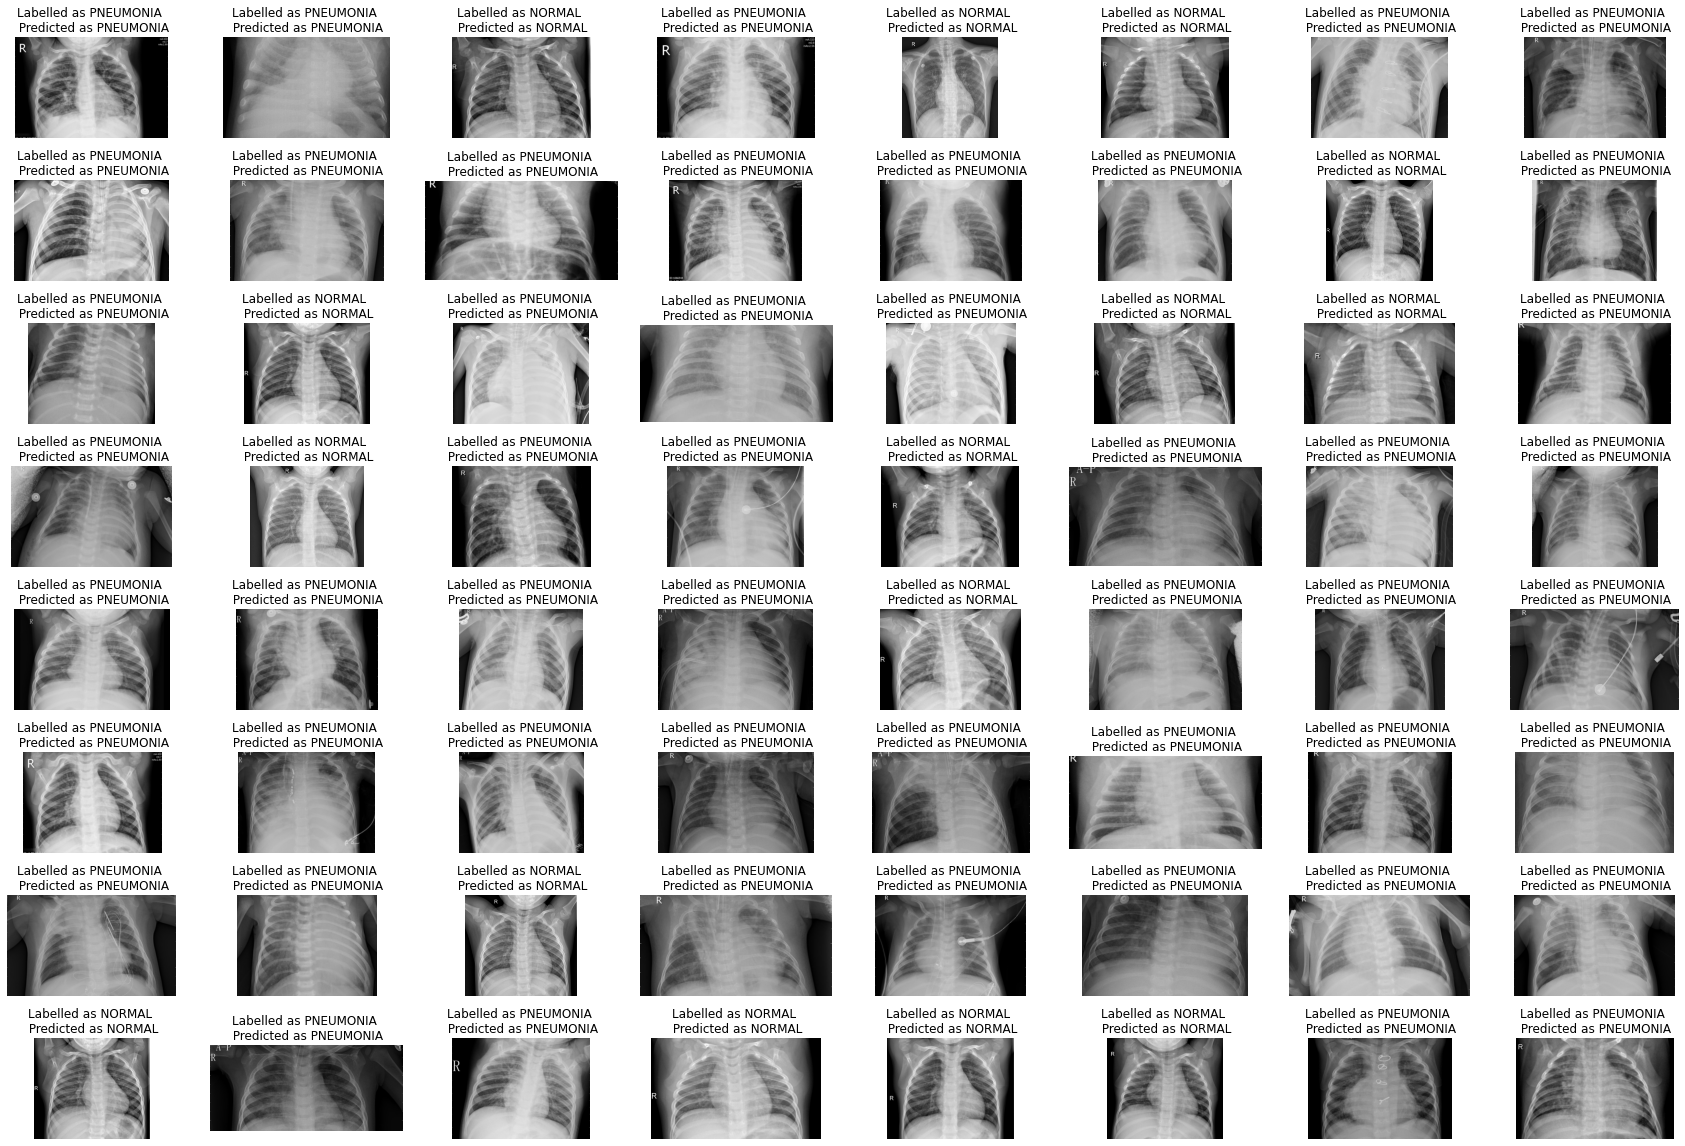

In [46]:
sample_test = test_dataset_df.sample(64).reset_index(drop = True)

fig = plt.figure(1, figsize = (24, 20))
#fig.suptitle("Sample Predictions")

for i in range(len(sample_test)):
    
    plt.subplot(10, 8, i + 1)
    image = load_img(sample_test.Image_Paths[i])
    plt.imshow(image)
    plt.axis("off")
    
    plt.title(f"Labelled as {sample_test['Labels'][i]} \n Predicted as {sample_test['test_preds'][i]}")
    #plt.title(f"Predicted as {sample_test['test_preds'][i]}")
    
plt.tight_layout()
plt.show()

## **Reminder: application to be built with these weights**

In [ ]:
gfydcvcyttdcgf ## breaking point

## **vgg19 model (224,224,3)**

In [47]:
base_model = tf.keras.applications.VGG19(weights='imagenet', input_shape=(224,224,3), include_top = False)

80150528/80134624 [==============================] - 1s 0us/step


In [48]:
for layer in base_model.layers:
  layer.trainable = False

In [49]:
network =Sequential()
network.add(base_model)
network.add(Flatten())
network.add(Dense(2, activation='softmax'))

In [50]:
network.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [51]:
network.fit(
  train_gen,
  validation_data=valid_gen,
  epochs=10,verbose=1
)

Epoch 1/10
261/261 [==============================] - 136s 518ms/step - loss: 0.3223 - accuracy: 0.8744 - val_loss: 0.3379 - val_accuracy: 0.8716
Epoch 2/10
261/261 [==============================] - 134s 512ms/step - loss: 0.2600 - accuracy: 0.9022 - val_loss: 0.1756 - val_accuracy: 0.9368
Epoch 3/10
261/261 [==============================] - 134s 512ms/step - loss: 0.2811 - accuracy: 0.9080 - val_loss: 0.2214 - val_accuracy: 0.9186
Epoch 4/10
261/261 [==============================] - 144s 551ms/step - loss: 0.1938 - accuracy: 0.9233 - val_loss: 0.1629 - val_accuracy: 0.9387
Epoch 5/10
261/261 [==============================] - 134s 514ms/step - loss: 0.2429 - accuracy: 0.9204 - val_loss: 0.4804 - val_accuracy: 0.8707
Epoch 6/10
261/261 [==============================] - 134s 514ms/step - loss: 0.2141 - accuracy: 0.9293 - val_loss: 0.2446 - val_accuracy: 0.9195
Epoch 7/10
261/261 [==============================] - 133s 511ms/step - loss: 0.2870 - accuracy: 0.9175 - val_loss: 0.1534 -

## **loss: 0.2146 - accuracy: 0.9331 - val_loss: 0.1226 - val_accuracy: 0.9646**

In [52]:
network.save('vgg19_model_covid.h5')

In [ ]:
jhufyvtyydrdyvyg

In [ ]:
from keras.models import load_model

In [ ]:
network = load_model('/content/vgg19_model_covid.h5')

## **Prediction**

In [53]:
test_paths, test_classes = test_loading_images(test_path)

In [54]:
img_paths , labels = labeling_images(test_paths, test_classes)

In [55]:
test_dataset = list(zip(img_paths, labels))

In [56]:
test_dataset_df = pd.DataFrame(train_dataset, columns = ['Image_Paths', 'Labels'])

In [57]:
test_dataset_df.head(10)

,Image_Paths,Labels
0,/content/chest_xray/train/NORMAL/NORMAL2-IM-04...,NORMAL
1,/content/chest_xray/train/NORMAL/NORMAL2-IM-04...,NORMAL
2,/content/chest_xray/train/NORMAL/IM-0704-0001....,NORMAL
3,/content/chest_xray/train/NORMAL/IM-0561-0001....,NORMAL
4,/content/chest_xray/train/NORMAL/IM-0506-0001....,NORMAL
5,/content/chest_xray/train/NORMAL/NORMAL2-IM-13...,NORMAL
6,/content/chest_xray/train/NORMAL/NORMAL2-IM-12...,NORMAL
7,/content/chest_xray/train/NORMAL/IM-0313-0001....,NORMAL
8,/content/chest_xray/train/NORMAL/NORMAL2-IM-06...,NORMAL
9,/content/chest_xray/train/NORMAL/IM-0493-0001....,NORMAL


In [58]:
test_dataset_df['Labels'].value_counts()

PNEUMONIA    3875
NORMAL       1341
Name: Labels, dtype: int64

In [59]:
test_dataset_df.tail(10)

,Image_Paths,Labels
5206,/content/chest_xray/train/PNEUMONIA/person364_...,PNEUMONIA
5207,/content/chest_xray/train/PNEUMONIA/person313_...,PNEUMONIA
5208,/content/chest_xray/train/PNEUMONIA/person1231...,PNEUMONIA
5209,/content/chest_xray/train/PNEUMONIA/person61_b...,PNEUMONIA
5210,/content/chest_xray/train/PNEUMONIA/person1036...,PNEUMONIA
5211,/content/chest_xray/train/PNEUMONIA/person1062...,PNEUMONIA
5212,/content/chest_xray/train/PNEUMONIA/person502_...,PNEUMONIA
5213,/content/chest_xray/train/PNEUMONIA/person406_...,PNEUMONIA
5214,/content/chest_xray/train/PNEUMONIA/person1644...,PNEUMONIA
5215,/content/chest_xray/train/PNEUMONIA/person779_...,PNEUMONIA


In [60]:
test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [61]:
test_gen = test_datagen.flow_from_dataframe(dataframe=test_dataset_df,
    x_col = 'Image_Paths',
    y_col = None,
    class_mode = None,
    target_size = (224,224),
    batch_size = 16,
    shuffle = False)

Found 5216 validated image filenames.


In [62]:
test_preds = network.predict(test_gen, steps = np.ceil(test_dataset_df.shape[0] / 16))

test_dataset_df["test_preds"] = np.argmax(test_preds, axis = 1)
labels = dict((v,k) for k,v in train_gen.class_indices.items())

test_dataset_df['test_preds'] = test_dataset_df['test_preds'].map(labels)

In [63]:
test_dataset_df.head(10)

,Image_Paths,Labels,test_preds
0,/content/chest_xray/train/NORMAL/NORMAL2-IM-04...,NORMAL,NORMAL
1,/content/chest_xray/train/NORMAL/NORMAL2-IM-04...,NORMAL,NORMAL
2,/content/chest_xray/train/NORMAL/IM-0704-0001....,NORMAL,NORMAL
3,/content/chest_xray/train/NORMAL/IM-0561-0001....,NORMAL,NORMAL
4,/content/chest_xray/train/NORMAL/IM-0506-0001....,NORMAL,NORMAL
5,/content/chest_xray/train/NORMAL/NORMAL2-IM-13...,NORMAL,NORMAL
6,/content/chest_xray/train/NORMAL/NORMAL2-IM-12...,NORMAL,NORMAL
7,/content/chest_xray/train/NORMAL/IM-0313-0001....,NORMAL,NORMAL
8,/content/chest_xray/train/NORMAL/NORMAL2-IM-06...,NORMAL,NORMAL
9,/content/chest_xray/train/NORMAL/IM-0493-0001....,NORMAL,NORMAL


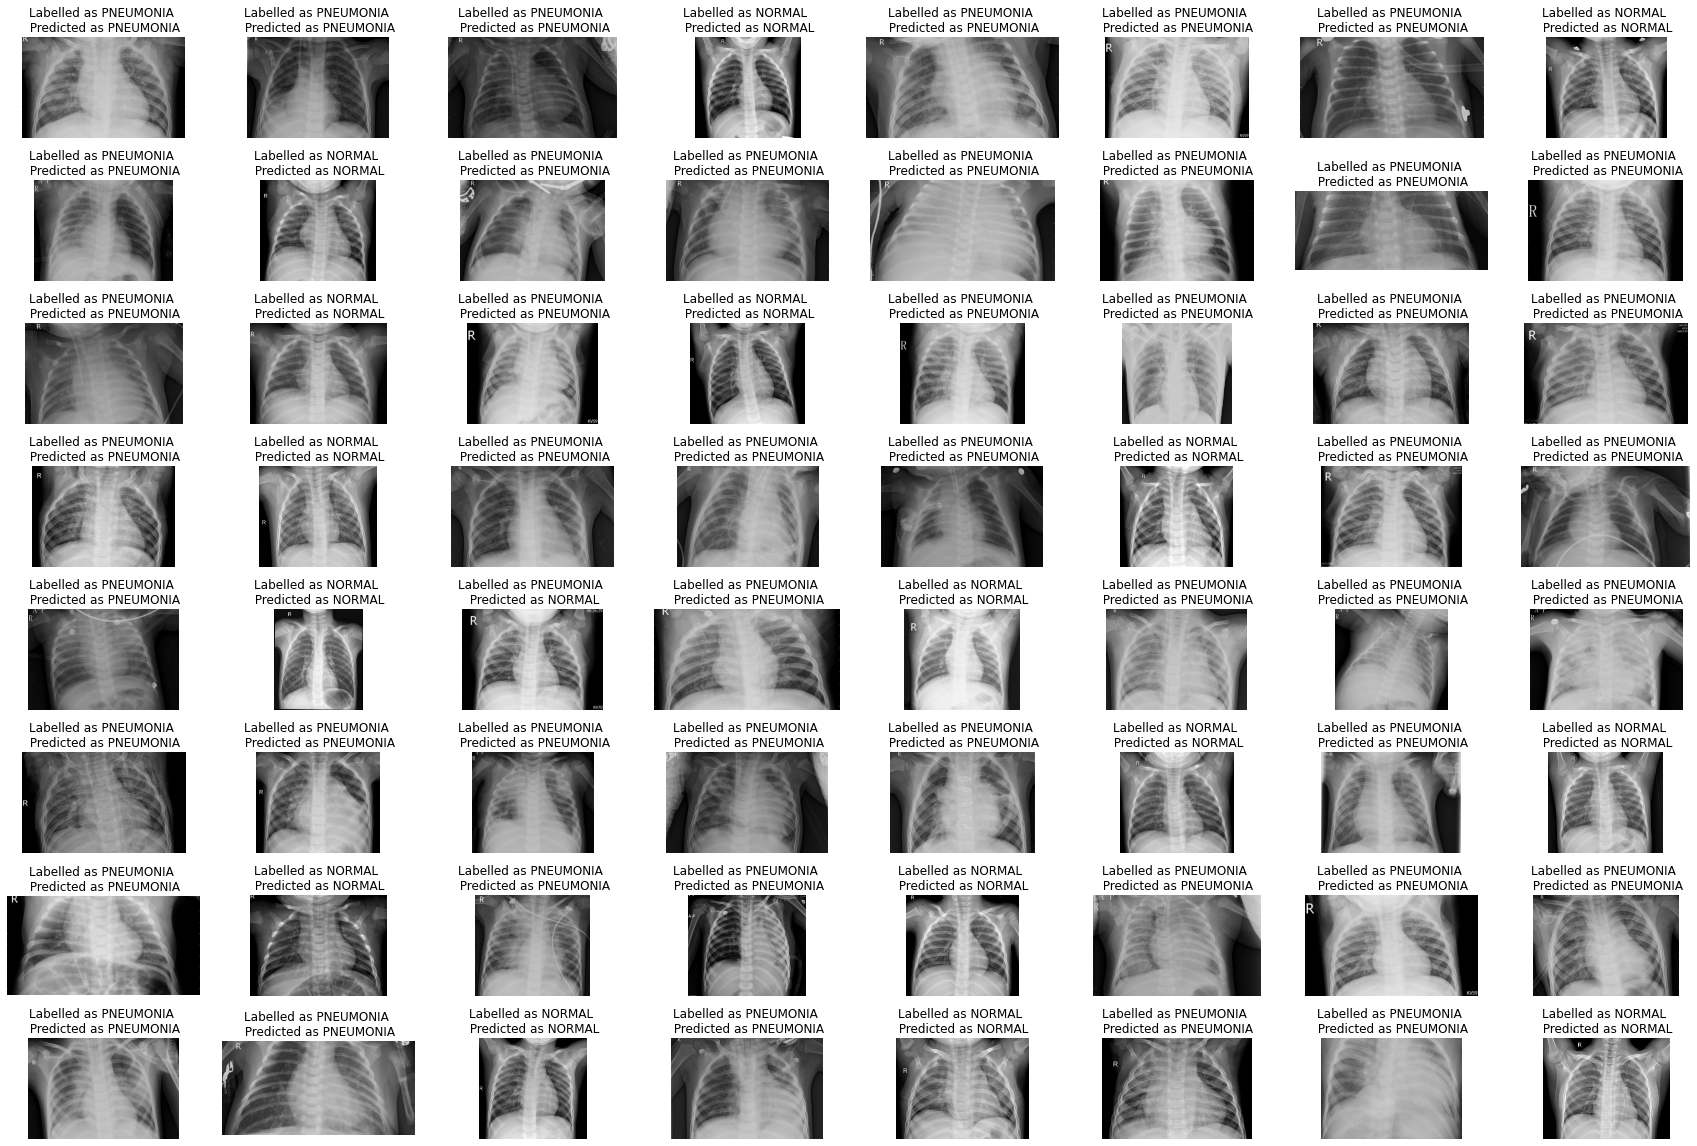

In [64]:
sample_test = test_dataset_df.sample(64).reset_index(drop = True)

fig = plt.figure(1, figsize = (24, 20))
#fig.suptitle("Sample Predictions")

for i in range(len(sample_test)):
    
    plt.subplot(10, 8, i + 1)
    image = load_img(sample_test.Image_Paths[i])
    plt.imshow(image)
    plt.axis("off")
    
    plt.title(f"Labelled as {sample_test['Labels'][i]} \n Predicted as {sample_test['test_preds'][i]}")
    #plt.title(f"Predicted as {sample_test['test_preds'][i]}")
    
plt.tight_layout()
plt.show()

## **vgg16 and vgg19 models are working awesome**
## **now proceed with 3 other models**